In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

Get dataset from Indiana State website

In [3]:
!wget -O CrashData.csv https://hub.mph.in.gov/dataset/4ac55064-1f0d-4e5e-aeee-12faf28d6175/resource/7081439e-33c9-45f5-9c0b-86d8a8c49252/download/aries_crash_data_2019.csv

--2020-10-17 15:58:39--  https://hub.mph.in.gov/dataset/4ac55064-1f0d-4e5e-aeee-12faf28d6175/resource/7081439e-33c9-45f5-9c0b-86d8a8c49252/download/aries_crash_data_2019.csv
Resolving hub.mph.in.gov (hub.mph.in.gov)... 13.226.166.44, 13.226.166.114, 13.226.166.86, ...
Connecting to hub.mph.in.gov (hub.mph.in.gov)|13.226.166.44|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘CrashData.csv’

CrashData.csv           [                <=> ] 334.23M  5.66MB/s    in 59s     

2020-10-17 15:59:38 (5.64 MB/s) - ‘CrashData.csv’ saved [350461498]



In [4]:
df = pd.read_csv("CrashData.csv")

# take a look at the dataset
df.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (90) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,INDEXING_NUMBER,INDIVIDUAL_MR_RECORD,UNIT_MR_NUMBER,STATUSCDE,PERSONNMB,PERSONTYPECDE,PERSONTYPEDESCR,GENDERCDE,AGE_GRP,POSINVEHCDE,...,TRAVDIRDESCR,EMGERENCY_RUN,FIREIND,COLLEVENTCDE,COLLEVENTDESCR,PRECOLLACTCDE,PRECOLLACTDESCR,DISTRICT,DISTRICT_NUM,SUBDISTRICT
0,9.032900e+11,903289713,1,AC,1.0,1.0,Driver,M,55-64 Years,1.0,...,NaN,N,N,53.0,NaN,1.0,Going Straight,Laporte,4.0,Laporte
1,9.032900e+11,903290005,1,AC,2.0,1.0,Driver,F,25-34 Years,1.0,...,Southwest,N,N,1.0,Another Motor Vehicle,2.0,Backing,Laporte,4.0,Plymouth
2,9.032890e+11,903289480,1,AC,1.0,1.0,Driver,F,35-44 Years,1.0,...,NaN,N,N,1.0,Another Motor Vehicle,1.0,Going Straight,Fort Wayne,2.0,Fort Wayne
3,9.032900e+11,903289523,1,AC,1.0,1.0,Driver,F,25-34 Years,1.0,...,Northwest,N,N,5.0,Deer,1.0,Going Straight,Seymour,5.0,Falls City
4,9.032930e+11,903293135,1,AC,1.0,1.0,Driver,M,35-44 Years,1.0,...,NaN,N,N,1.0,Another Motor Vehicle,1.0,Going Straight,Vincennes,6.0,Evansville


Evaluate & Clean data

In [5]:
df.INJSTATUSCDE.unique()

array([nan,  2.,  3.,  6.,  7.,  4.,  1.])

In [6]:
df["INJSTATUSCDE"].fillna(8, inplace = True) 
df["INJSTATUSDESCR"].fillna("NO INJURY", inplace = True) 
df.groupby(['INJSTATUSCDE','INJSTATUSDESCR']).size()

INJSTATUSCDE  INJSTATUSDESCR    
1.0           Fatal                    674
2.0           Incapacitating         16964
3.0           Non-incapacitating     14570
4.0           Possible                4763
6.0           Unknown                  734
7.0           Refused                 2487
8.0           NO INJURY             585510
dtype: int64

Check Correlation

In [7]:
df.corr(method='pearson')

,INDEXING_NUMBER,INDIVIDUAL_MR_RECORD,UNIT_MR_NUMBER,PERSONNMB,PERSONTYPECDE,POSINVEHCDE,EJECTTRAPCDE,SAFETYEQUUSEDCDE,INJSTATUSCDE,INJNATURECDE,...,UNIT_VEHICLE_NUMBER,UNITTYPECDE,VEHYEARTXT,OCCUPSNMB,AXELSTXT,VEHUSECDE,ROADTYPECDE,COLLEVENTCDE,PRECOLLACTCDE,DISTRICT_NUM
INDEXING_NUMBER,1.000000,0.999986,0.023652,0.005898,0.001859,0.007936,0.012412,-0.008721,-0.013378,-0.024674,...,0.999986,0.016227,0.002510,0.007904,-0.007172,-0.007515,-0.008514,-0.069964,0.020976,0.016269
INDIVIDUAL_MR_RECORD,0.999986,1.000000,0.023653,0.005893,0.001851,0.007964,0.012410,-0.008743,-0.013376,-0.024688,...,1.000000,0.016230,0.002505,0.007933,-0.007185,-0.007509,-0.008537,-0.069979,0.020967,0.016255
UNIT_MR_NUMBER,0.023652,0.023653,1.000000,-0.025375,0.030441,0.027293,-0.032254,0.058789,-0.021590,0.120634,...,0.023653,0.005847,0.009799,-0.001068,-0.001561,-0.011852,0.042433,-0.267685,0.310376,-0.006734
PERSONNMB,0.005898,0.005893,-0.025375,1.000000,0.428909,0.487592,0.024296,-0.055466,-0.050878,0.053053,...,0.005893,0.064869,-0.000091,0.119811,0.092756,0.034237,0.028454,0.030963,-0.059429,0.003100
PERSONTYPECDE,0.001859,0.001851,0.030441,0.428909,1.000000,0.633998,0.090260,-0.154403,0.225709,-0.049122,...,0.001851,0.045181,-0.003017,-0.045070,0.056053,0.012793,0.019412,-0.001293,0.054636,-0.002708
POSINVEHCDE,0.007936,0.007964,0.027293,0.487592,0.633998,1.000000,0.070338,-0.118463,-0.355509,0.011620,...,0.007964,0.061234,-0.002088,0.203481,-0.008057,0.031559,-0.013638,0.034738,-0.002054,0.007618
EJECTTRAPCDE,0.012412,0.012410,-0.032254,0.024296,0.090260,0.070338,1.000000,-0.147101,-0.227610,-0.210473,...,0.012410,0.160047,-0.084906,0.000353,-0.019188,0.000718,-0.014076,0.097914,-0.028590,0.000644
SAFETYEQUUSEDCDE,-0.008721,-0.008743,0.058789,-0.055466,-0.154403,-0.118463,-0.147101,1.000000,0.256268,0.158846,...,-0.008743,-0.068900,0.036744,-0.048113,0.031915,-0.017978,0.041549,-0.117820,0.078211,0.004445
INJSTATUSCDE,-0.013378,-0.013376,-0.021590,-0.050878,0.225709,-0.355509,-0.227610,0.256268,1.000000,0.191977,...,-0.013376,-0.095513,-0.000002,-0.080149,0.031244,0.011301,0.023992,-0.073868,0.029043,-0.010407
INJNATURECDE,-0.024674,-0.024688,0.120634,0.053053,-0.049122,0.011620,-0.210473,0.158846,0.191977,1.000000,...,-0.024688,-0.172326,0.030441,0.043126,0.037601,0.027142,0.027504,-0.170258,0.080946,0.018184


Evaluated the correlations and selected columns with potential for final model - focus on fields known prior to accident

In [8]:
testdf = df[['INJSTATUSCDE','INJSTATUSDESCR','SAFETYEQUUSEDCDE','SAFETYEQUUSEDDESCR','LIGHTCONDCDE','LIGHTCONDDESCR','WEATHERCDE','WEATHERDESCR',
             'SURFACETYPECDE','SURFACETYPECDE_CONDDESCR','ROADTYPEDESCR','UNITTYPECDE','UNITTYPEDESCR']] 
testdf.head()

,INJSTATUSCDE,INJSTATUSDESCR,SAFETYEQUUSEDCDE,SAFETYEQUUSEDDESCR,LIGHTCONDCDE,LIGHTCONDDESCR,WEATHERCDE,WEATHERDESCR,SURFACETYPECDE,SURFACETYPECDE_CONDDESCR,ROADTYPEDESCR,UNITTYPECDE,UNITTYPEDESCR
0,8.0,NO INJURY,10.0,Lap and Harness,3.0,Dark (Lighted),5.0,Sleet/Hail/Freezing Rain,2.0,Ice,Two Lanes (Two Way),4.0,Sport Utility Vehicle
1,8.0,NO INJURY,10.0,Lap and Harness,4.0,Dark (Not Lighted),1.0,Clear,1.0,Dry,Two Lanes (Two Way),4.0,Sport Utility Vehicle
2,8.0,NO INJURY,10.0,Lap and Harness,3.0,Dark (Lighted),1.0,Clear,1.0,Dry,Two Lanes (Two Way),1.0,Passenger Car/Station Wagon
3,8.0,NO INJURY,7.0,Unknown,4.0,Dark (Not Lighted),2.0,Cloudy,1.0,Wet,Two Lanes (Two Way),3.0,Van
4,8.0,NO INJURY,10.0,Lap and Harness,3.0,Dark (Lighted),1.0,Clear,1.0,Dry,One Lane (One Way),2.0,Pickup


In [9]:
testdf.SAFETYEQUUSEDCDE.unique()

array([10.,  7.,  1.,  6., nan,  5.,  3.,  2.,  9.,  4., 11.,  8.])

In [10]:
testdf["SAFETYEQUUSEDCDE"].fillna(7, inplace = True) 
testdf["SAFETYEQUUSEDDESCR"].fillna("Unknown", inplace = True) 

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [11]:
testdf.LIGHTCONDCDE.unique()

array([ 3.,  4.,  1.,  2., nan,  5.])

In [12]:
testdf["LIGHTCONDCDE"].fillna(5, inplace = True) 
testdf["LIGHTCONDDESCR"].fillna("Unknown", inplace = True) 

In [13]:
testdf.WEATHERDESCR.unique()

array(['Sleet/Hail/Freezing Rain', 'Clear', 'Cloudy', 'Snow', 'Rain', nan,
       'Severe Cross Wind', 'Fog/Smoke/Smog', 'Blowing Sand/Soil/Snow'],
      dtype=object)

In [14]:
testdf.WEATHERCDE.unique()

array([ 5.,  1.,  2.,  4.,  3., nan,  7.,  6.,  8.])

In [15]:
testdf["WEATHERCDE"].fillna(9, inplace = True) 
testdf["WEATHERDESCR"].fillna("Unknown", inplace = True) 

In [16]:
testdf.UNITTYPECDE.unique()

array([ 4.,  1.,  3.,  2., 24., nan, 17., 14.,  5.,  8., 25., 21., 20.,
       11.,  6.,  7., 19.,  9., 12., 15., 18., 13., 16., 23., 26., 10.,
       22., 28.])

In [17]:
testdf.UNITTYPEDESCR.unique()

array(['Sport Utility Vehicle', 'Passenger Car/Station Wagon', 'Van',
       'Pickup', 'Motor Driven Cycle Class A', nan, 'Unknown Type',
       'Bus/Seats 9-15 Persons with Driver',
       'Truck (Single 2 Axle, 6 Tires)', 'Tractor/One Semi Trailer',
       'Motor Driven Cycle Class B', 'Pedalcycle Non-Motor Vehicle',
       'Pedestrian', 'Tractor (Cab Only, No Trailer)',
       'Truck (Single 3 or more Axles)', 'Truck/Trailer (not semi)',
       'Combination Vehicle', 'Tractor/Double Trailer',
       'Motor Home/Recreational Vehicle',
       'Bus/Seats 15+ Persons with Driver', 'Farm Vehicle', 'Motorcycle',
       'School Bus', 'Animal Drawn Vehicle (Non-Motor Vehicle)',
       'Motorized Bicycle', 'Tractor/Triple Trailer', 'Moped'],
      dtype=object)

In [18]:
testdf["UNITTYPECDE"].fillna(99, inplace = True) 
testdf["UNITTYPEDESCR"].fillna("Unknown", inplace = True) 

In [19]:
testdf.corr(method='pearson')

,INJSTATUSCDE,SAFETYEQUUSEDCDE,LIGHTCONDCDE,WEATHERCDE,SURFACETYPECDE,UNITTYPECDE
INJSTATUSCDE,1.000000,0.026071,-0.017490,0.008851,0.013295,-0.019403
SAFETYEQUUSEDCDE,0.026071,1.000000,-0.043070,0.004949,-0.008999,-0.066257
LIGHTCONDCDE,-0.017490,-0.043070,1.000000,0.138364,-0.000177,0.037979
WEATHERCDE,0.008851,0.004949,0.138364,1.000000,-0.000006,0.022417
SURFACETYPECDE,0.013295,-0.008999,-0.000177,-0.000006,1.000000,0.020030
UNITTYPECDE,-0.019403,-0.066257,0.037979,0.022417,0.020030,1.000000


In [20]:
X = pd.concat([pd.get_dummies(testdf['SAFETYEQUUSEDDESCR']),pd.get_dummies(testdf['LIGHTCONDDESCR']),pd.get_dummies(testdf['WEATHERDESCR']),pd.get_dummies(testdf['SURFACETYPECDE_CONDDESCR']),
              pd.get_dummies(testdf['ROADTYPEDESCR']),pd.get_dummies(testdf['UNITTYPEDESCR'])],axis=1)
X.head()

,Airbag Deployed (No Restraint),Airbag Deployed + Harness,Child Restraint (Missing from Driver set),Harness,Helmet,Lap Belt Only,Lap and Harness,No Helmet,No Restraint,Other,...,"Tractor (Cab Only, No Trailer)",Tractor/Double Trailer,Tractor/One Semi Trailer,Tractor/Triple Trailer,"Truck (Single 2 Axle, 6 Tires)",Truck (Single 3 or more Axles),Truck/Trailer (not semi),Unknown,Unknown Type,Van
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
y=testdf['INJSTATUSDESCR'].values
y[0:5]

array(['NO INJURY', 'NO INJURY', 'NO INJURY', 'NO INJURY', 'NO INJURY'],
      dtype=object)

In [22]:
from sklearn import preprocessing
X=preprocessing.StandardScaler().fit(X).transform(X)

In [23]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20, random_state=4)
print ('Train set:',X_train.shape, y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)

Train set: (500561, 68) (500561,)
Test set: (125141, 68) (125141,)


Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import itertools
InjuryTree = DecisionTreeClassifier(criterion='entropy',max_depth=6)
InjuryTree

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [25]:
InjuryTree.fit(X_train,y_train)
predTree=InjuryTree.predict(X_test)

In [26]:
print(np.unique(predTree))
print(np.unique(y_test))
print('Decision Tree Accuracy: ',metrics.accuracy_score(y_test,predTree))

['Fatal' 'Incapacitating' 'NO INJURY' 'Non-incapacitating' 'Possible']
['Fatal' 'Incapacitating' 'NO INJURY' 'Non-incapacitating' 'Possible'
 'Refused' 'Unknown']
Decision Tree Accuracy:  0.9367513444834227


Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [28]:
yhat=LR.predict(X_test)
yhat

array(['NO INJURY', 'NO INJURY', 'NO INJURY', ..., 'NO INJURY',
       'NO INJURY', 'NO INJURY'], dtype=object)

In [29]:
yhat_prob=LR.predict_proba(X_test)
yhat_prob

array([[1.99980046e-03, 3.89940602e-03, 9.87012777e-01, ...,
        2.04424214e-03, 1.47546464e-03, 1.19255403e-03],
       [1.18281854e-03, 1.45701337e-03, 9.93111373e-01, ...,
        9.16308231e-04, 7.85895080e-04, 1.24588177e-03],
       [1.16768961e-03, 9.46300143e-03, 9.66399624e-01, ...,
        5.28024011e-03, 3.93234208e-03, 2.26061934e-03],
       ...,
       [1.46103668e-03, 5.57686849e-03, 9.82633346e-01, ...,
        2.48223575e-03, 1.69588514e-03, 1.59246562e-03],
       [1.87097410e-03, 6.19914925e-03, 9.81326902e-01, ...,
        3.38870694e-03, 1.17901957e-03, 1.83263986e-03],
       [1.77213734e-03, 3.50833148e-02, 8.98261746e-01, ...,
        1.58432539e-02, 9.48719766e-03, 2.89777758e-03]])

In [30]:
def plot_confusion_matrix(cm,classes,
                          normalize=False,
                          title='Confusion matrix',
                         cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix, without normalization')
        
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    
    fmt= '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j],fmt),
                horizontalalignment='center',
                color='white' if cm[i,j] > thresh else 'black')
        
    plt.tight_layout()
    plt.ylabel('True Injury')
    plt.xlabel('Predicted Injury')

Confusion matrix, without normalization
[[     0     41      2      0      0      0    103]
 [     0    459     40      0      0      0   3029]
 [     0    187     49      0      0      0   2644]
 [     0     61     13      0      0      0    877]
 [     0      6      2      0      0      0    129]
 [     0     18      3      0      0      0    504]
 [     0    226      5      0      0      0 116743]]


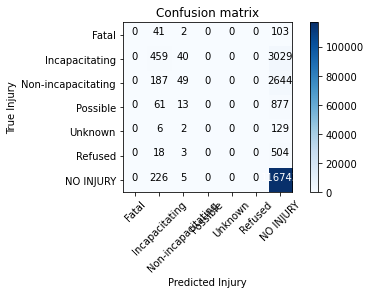

In [31]:
conf_matrix = confusion_matrix(y_test,yhat, labels=['Fatal','Incapacitating','Non-incapacitating','Possible','Unknown','Refused','NO INJURY'])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(conf_matrix,classes=['Fatal','Incapacitating','Non-incapacitating','Possible','Unknown','Refused','NO INJURY'], normalize=False,title='Confusion matrix')


In [32]:
print(classification_report(y_test,yhat))

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                    precision    recall  f1-score   support

             Fatal       0.00      0.00      0.00       146
    Incapacitating       0.46      0.13      0.20      3528
         NO INJURY       0.94      1.00      0.97    116974
Non-incapacitating       0.43      0.02      0.03      2880
          Possible       0.00      0.00      0.00       951
           Refused       0.00      0.00      0.00       525
           Unknown       0.00      0.00      0.00       137

          accuracy                           0.94    125141
         macro avg       0.26      0.16      0.17    125141
      weighted avg       0.90      0.94      0.91    125141



In [33]:
from sklearn.metrics import log_loss
log_loss(y_test,yhat_prob)

0.2533630270412489

Remove columns to see if we can get better precision on injury with logistic regression

In [34]:
X = pd.concat([pd.get_dummies(testdf['SAFETYEQUUSEDDESCR']),pd.get_dummies(testdf['LIGHTCONDDESCR']),pd.get_dummies(testdf['WEATHERDESCR']),pd.get_dummies(testdf['SURFACETYPECDE_CONDDESCR']),
              pd.get_dummies(testdf['UNITTYPEDESCR'])],axis=1)
X.head()

,Airbag Deployed (No Restraint),Airbag Deployed + Harness,Child Restraint (Missing from Driver set),Harness,Helmet,Lap Belt Only,Lap and Harness,No Helmet,No Restraint,Other,...,"Tractor (Cab Only, No Trailer)",Tractor/Double Trailer,Tractor/One Semi Trailer,Tractor/Triple Trailer,"Truck (Single 2 Axle, 6 Tires)",Truck (Single 3 or more Axles),Truck/Trailer (not semi),Unknown,Unknown Type,Van
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20, random_state=4)
print ('Train set:',X_train.shape, y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)

Train set: (500561, 59) (500561,)
Test set: (125141, 59) (125141,)


In [36]:
LR2=LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR2

LogisticRegression(C=0.01, solver='liblinear')

In [37]:
yhat=LR2.predict(X_test)
yhat

array(['NO INJURY', 'NO INJURY', 'NO INJURY', ..., 'NO INJURY',
       'NO INJURY', 'NO INJURY'], dtype=object)

In [38]:
yhat_prob=LR2.predict_proba(X_test)
yhat_prob

array([[1.65e-03, 6.32e-03, 9.82e-01, ..., 2.82e-03, 1.47e-03, 1.09e-03],
       [5.07e-04, 5.73e-03, 9.86e-01, ..., 1.81e-03, 1.03e-03, 6.31e-04],
       [6.30e-04, 3.07e-02, 9.16e-01, ..., 1.05e-02, 6.48e-03, 1.52e-03],
       ...,
       [6.36e-04, 5.22e-03, 9.85e-01, ..., 2.02e-03, 1.04e-03, 8.18e-04],
       [3.17e-03, 6.44e-03, 9.78e-01, ..., 3.47e-03, 1.58e-03, 2.62e-03],
       [8.83e-04, 2.69e-02, 9.18e-01, ..., 1.24e-02, 6.46e-03, 1.77e-03]])

Confusion matrix, without normalization
[[     0     16      0      0      0      0    130]
 [     0    192      0      0      0      0   3336]
 [     0     68      0      0      0      0   2812]
 [     0     21      0      0      0      0    930]
 [     0      2      0      0      0      0    135]
 [     0      5      1      0      0      0    519]
 [     0     84      0      0      0      0 116890]]


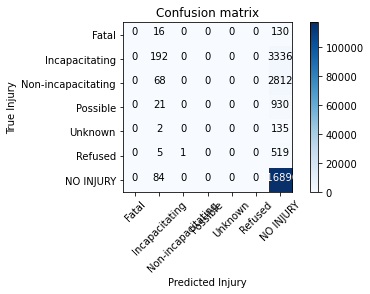

In [39]:
conf_matrix = confusion_matrix(y_test,yhat, labels=['Fatal','Incapacitating','Non-incapacitating','Possible','Unknown','Refused','NO INJURY'])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(conf_matrix,classes=['Fatal','Incapacitating','Non-incapacitating','Possible','Unknown','Refused','NO INJURY'], normalize=False,title='Confusion matrix')

In [40]:
print(classification_report(y_test,yhat))

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                    precision    recall  f1-score   support

             Fatal       0.00      0.00      0.00       146
    Incapacitating       0.49      0.05      0.10      3528
         NO INJURY       0.94      1.00      0.97    116974
Non-incapacitating       0.00      0.00      0.00      2880
          Possible       0.00      0.00      0.00       951
           Refused       0.00      0.00      0.00       525
           Unknown       0.00      0.00      0.00       137

          accuracy                           0.94    125141
         macro avg       0.20      0.15      0.15    125141
      weighted avg       0.89      0.94      0.91    125141



In [41]:
log_loss(y_test,yhat_prob)

0.26118189721972657

Remove one additional column to try to refine

In [42]:
X = pd.concat([pd.get_dummies(testdf['SAFETYEQUUSEDDESCR']),pd.get_dummies(testdf['LIGHTCONDDESCR']),pd.get_dummies(testdf['WEATHERDESCR']),
              pd.get_dummies(testdf['UNITTYPEDESCR'])],axis=1)
X.head()

,Airbag Deployed (No Restraint),Airbag Deployed + Harness,Child Restraint (Missing from Driver set),Harness,Helmet,Lap Belt Only,Lap and Harness,No Helmet,No Restraint,Other,...,"Tractor (Cab Only, No Trailer)",Tractor/Double Trailer,Tractor/One Semi Trailer,Tractor/Triple Trailer,"Truck (Single 2 Axle, 6 Tires)",Truck (Single 3 or more Axles),Truck/Trailer (not semi),Unknown,Unknown Type,Van
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20, random_state=4)
print ('Train set:',X_train.shape, y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)

Train set: (500561, 52) (500561,)
Test set: (125141, 52) (125141,)


In [44]:
LR3=LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR3

LogisticRegression(C=0.01, solver='liblinear')

In [45]:
yhat=LR3.predict(X_test)
yhat

array(['NO INJURY', 'NO INJURY', 'NO INJURY', ..., 'NO INJURY',
       'NO INJURY', 'NO INJURY'], dtype=object)

In [46]:
yhat_prob=LR3.predict_proba(X_test)
yhat_prob

array([[1.89e-03, 6.26e-03, 9.81e-01, ..., 2.99e-03, 1.60e-03, 1.33e-03],
       [5.08e-04, 5.71e-03, 9.86e-01, ..., 1.82e-03, 1.03e-03, 6.42e-04],
       [6.37e-04, 3.06e-02, 9.17e-01, ..., 1.05e-02, 6.43e-03, 1.54e-03],
       ...,
       [6.67e-04, 5.26e-03, 9.85e-01, ..., 2.04e-03, 1.06e-03, 8.24e-04],
       [2.62e-03, 5.91e-03, 9.80e-01, ..., 3.28e-03, 1.59e-03, 2.21e-03],
       [8.83e-04, 2.78e-02, 9.20e-01, ..., 1.17e-02, 6.11e-03, 1.61e-03]])

Confusion matrix, without normalization
[[     0     16      0      0      0      0    130]
 [     0    192      0      0      0      0   3336]
 [     0     67      0      0      0      0   2813]
 [     0     21      0      0      0      0    930]
 [     0      2      0      0      0      0    135]
 [     0      5      1      0      0      0    519]
 [     0     85      0      0      0      0 116889]]


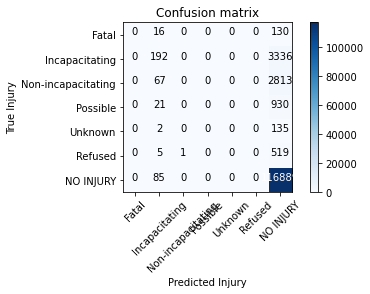

In [47]:
conf_matrix = confusion_matrix(y_test,yhat, labels=['Fatal','Incapacitating','Non-incapacitating','Possible','Unknown','Refused','NO INJURY'])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(conf_matrix,classes=['Fatal','Incapacitating','Non-incapacitating','Possible','Unknown','Refused','NO INJURY'], normalize=False,title='Confusion matrix')

In [48]:
print(classification_report(y_test,yhat))

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                    precision    recall  f1-score   support

             Fatal       0.00      0.00      0.00       146
    Incapacitating       0.49      0.05      0.10      3528
         NO INJURY       0.94      1.00      0.97    116974
Non-incapacitating       0.00      0.00      0.00      2880
          Possible       0.00      0.00      0.00       951
           Refused       0.00      0.00      0.00       525
           Unknown       0.00      0.00      0.00       137

          accuracy                           0.94    125141
         macro avg       0.20      0.15      0.15    125141
      weighted avg       0.89      0.94      0.91    125141



In [49]:
log_loss(y_test,yhat_prob)

0.26122741145554806

In [50]:
injdf = testdf

In [51]:
injdf.replace({'INJSTATUSCDE': {2 : 1, 3 : 1 , 4 : 1 , 6 : 8, 7 : 8 }}, inplace=True)
injdf.replace({'INJSTATUSDESCR': {'Fatal':'INJURY','Incapacitating':'INJURY','Non-incapacitating':'INJURY','Possible':'INJURY','Unknown':'NO INJURY','Refused':'NO INJURY' }}, inplace=True)
                
injdf.groupby(['INJSTATUSCDE','INJSTATUSDESCR']).size()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/generic.py:6666: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regex=regex,


INJSTATUSCDE  INJSTATUSDESCR
1.0           INJURY             36971
8.0           NO INJURY         588731
dtype: int64

In [52]:
X = pd.concat([pd.get_dummies(testdf['SAFETYEQUUSEDDESCR']),pd.get_dummies(testdf['LIGHTCONDDESCR']),pd.get_dummies(testdf['WEATHERDESCR']),pd.get_dummies(testdf['SURFACETYPECDE_CONDDESCR']),
              pd.get_dummies(testdf['UNITTYPEDESCR'])],axis=1)
X.head()

,Airbag Deployed (No Restraint),Airbag Deployed + Harness,Child Restraint (Missing from Driver set),Harness,Helmet,Lap Belt Only,Lap and Harness,No Helmet,No Restraint,Other,...,"Tractor (Cab Only, No Trailer)",Tractor/Double Trailer,Tractor/One Semi Trailer,Tractor/Triple Trailer,"Truck (Single 2 Axle, 6 Tires)",Truck (Single 3 or more Axles),Truck/Trailer (not semi),Unknown,Unknown Type,Van
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
y=testdf['INJSTATUSDESCR'].values
y[0:5]

array(['NO INJURY', 'NO INJURY', 'NO INJURY', 'NO INJURY', 'NO INJURY'],
      dtype=object)

In [54]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20, random_state=4)
print ('Train set:',X_train.shape, y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)

Train set: (500561, 59) (500561,)
Test set: (125141, 59) (125141,)


Decision Tree

In [55]:
InjuryTree2 = DecisionTreeClassifier(criterion='entropy',max_depth=6)
InjuryTree2

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [56]:
InjuryTree2.fit(X_train,y_train)
predTree2=InjuryTree2.predict(X_test)

In [57]:
print(np.unique(predTree2))
print(np.unique(y_test))
print('Decision Tree 2 Accuracy: ',metrics.accuracy_score(y_test,predTree2))

['INJURY' 'NO INJURY']
['INJURY' 'NO INJURY']
Decision Tree 2 Accuracy:  0.9459569605485013


In [58]:
LR4=LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR4

LogisticRegression(C=0.01, solver='liblinear')

In [59]:
yhat=LR4.predict(X_test)
yhat

array(['NO INJURY', 'NO INJURY', 'NO INJURY', ..., 'NO INJURY',
       'NO INJURY', 'NO INJURY'], dtype=object)

In [60]:
yhat_prob=LR4.predict_proba(X_test)
yhat_prob

array([[0.01, 0.99],
       [0.01, 0.99],
       [0.08, 0.92],
       ...,
       [0.01, 0.99],
       [0.01, 0.99],
       [0.07, 0.93]])

Confusion matrix, without normalization
[[   771   6734]
 [   275 117361]]


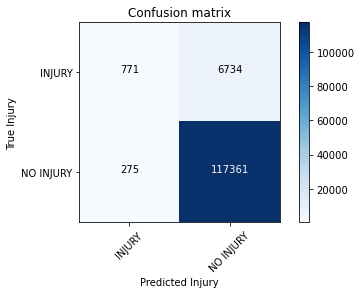

In [61]:
conf_matrix = confusion_matrix(y_test,yhat, labels=['INJURY','NO INJURY'])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(conf_matrix,classes=['INJURY','NO INJURY'], normalize=False,title='Confusion matrix')

In [62]:
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

      INJURY       0.74      0.10      0.18      7505
   NO INJURY       0.95      1.00      0.97    117636

    accuracy                           0.94    125141
   macro avg       0.84      0.55      0.58    125141
weighted avg       0.93      0.94      0.92    125141



In [63]:
log_loss(y_test,yhat_prob)

0.1643101928155526

Model Evaluation using 2018 data

In [64]:
!wget -O CrashData2018.csv https://hub.mph.in.gov/dataset/4ac55064-1f0d-4e5e-aeee-12faf28d6175/resource/cc90589c-72d8-4d92-a5fe-73254b555c73/download/aries_crash_data_2018.csv

--2020-10-17 16:02:24--  https://hub.mph.in.gov/dataset/4ac55064-1f0d-4e5e-aeee-12faf28d6175/resource/cc90589c-72d8-4d92-a5fe-73254b555c73/download/aries_crash_data_2018.csv
Resolving hub.mph.in.gov (hub.mph.in.gov)... 13.249.109.52, 13.249.109.23, 13.249.109.20, ...
Connecting to hub.mph.in.gov (hub.mph.in.gov)|13.249.109.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘CrashData2018.csv’

CrashData2018.csv       [          <=>       ] 476.65M  5.19MB/s    in 93s     

2020-10-17 16:03:58 (5.11 MB/s) - ‘CrashData2018.csv’ saved [499799574]



In [65]:
c2018df=pd.read_csv('CrashData2018.csv')
c2018df.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (7,8,10,12,14,15,17,19,21,23,25,44,45,90,98) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,INDEXING_NUMBER,INDIVIDUAL_MR_RECORD,UNIT_MR_NUMBER,STATUSCDE,PERSONNMB,PERSONTYPECDE,PERSONTYPEDESCR,GENDERCDE,AGE_GRP,POSINVEHCDE,...,TRAVDIRDESCR,EMGERENCY_RUN,FIREIND,COLLEVENTCDE,COLLEVENTDESCR,PRECOLLACTCDE,PRECOLLACTDESCR,DISTRICT,DISTRICT_NUM,SUBDISTRICT
0,903091099001,903091099,1,AC,1.0,5.0,Owner Vehicle,NaN,NaN,NaN,...,NaN,N,N,1.0,Another Motor Vehicle,2.0,Backing,Greenfield,3.0,Indianapolis
1,903084265001,903084265,1,AC,1.0,5.0,Owner Vehicle,NaN,NaN,NaN,...,NaN,N,N,1.0,Another Motor Vehicle,2.0,Backing,Greenfield,3.0,Indianapolis
2,903085095001,903085095,1,AC,1.0,5.0,Owner Vehicle,NaN,NaN,NaN,...,NaN,N,N,1.0,Another Motor Vehicle,1.0,Going Straight,Greenfield,3.0,Indianapolis
3,903085099001,903085099,1,AC,1.0,5.0,Owner Vehicle,NaN,NaN,NaN,...,NaN,N,N,1.0,Another Motor Vehicle,1.0,Going Straight,Greenfield,3.0,Indianapolis
4,903091166002,903091166,1,AC,2.0,5.0,Owner Vehicle,NaN,NaN,NaN,...,NaN,N,N,1.0,Another Motor Vehicle,2.0,Backing,Greenfield,3.0,Indianapolis


In [66]:
modeldf = c2018df[['INJSTATUSCDE','INJSTATUSDESCR','SAFETYEQUUSEDCDE','SAFETYEQUUSEDDESCR','LIGHTCONDCDE','LIGHTCONDDESCR','WEATHERCDE','WEATHERDESCR',
             'SURFACETYPECDE','SURFACETYPECDE_CONDDESCR','ROADTYPEDESCR','UNITTYPECDE','UNITTYPEDESCR']] 
modeldf["INJSTATUSCDE"].fillna(8, inplace = True) 
modeldf["INJSTATUSDESCR"].fillna("NO INJURY", inplace = True) 
modeldf["SAFETYEQUUSEDCDE"].fillna(7, inplace = True) 
modeldf["SAFETYEQUUSEDDESCR"].fillna("Unknown", inplace = True) 
modeldf["LIGHTCONDCDE"].fillna(5, inplace = True) 
modeldf["LIGHTCONDDESCR"].fillna("Unknown", inplace = True) 
modeldf["WEATHERCDE"].fillna(9, inplace = True) 
modeldf["WEATHERDESCR"].fillna("Unknown", inplace = True)
modeldf["UNITTYPECDE"].fillna(99, inplace = True) 
modeldf["UNITTYPEDESCR"].fillna("Unknown", inplace = True) 
modeldf.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,INJSTATUSCDE,INJSTATUSDESCR,SAFETYEQUUSEDCDE,SAFETYEQUUSEDDESCR,LIGHTCONDCDE,LIGHTCONDDESCR,WEATHERCDE,WEATHERDESCR,SURFACETYPECDE,SURFACETYPECDE_CONDDESCR,ROADTYPEDESCR,UNITTYPECDE,UNITTYPEDESCR
0,8.0,NO INJURY,7.0,Unknown,1.0,Daylight,1.0,Clear,1.0,Dry,Two Lanes (Two Way),1.0,Passenger Car/Station Wagon
1,8.0,NO INJURY,7.0,Unknown,1.0,Daylight,1.0,Clear,1.0,Dry,Multi-Lane Undivided (Two Way),1.0,Passenger Car/Station Wagon
2,8.0,NO INJURY,7.0,Unknown,1.0,Daylight,1.0,Clear,1.0,Dry,Multi-Lane Undivided (Two Way),1.0,Passenger Car/Station Wagon
3,8.0,NO INJURY,7.0,Unknown,1.0,Daylight,1.0,Clear,1.0,Dry,Multi-Lane Undivided (Two Way),1.0,Passenger Car/Station Wagon
4,8.0,NO INJURY,7.0,Unknown,1.0,Daylight,1.0,Clear,1.0,Dry,One Lane (One Way),1.0,Passenger Car/Station Wagon


In [67]:
model2df = c2018df[['INJSTATUSCDE','INJSTATUSDESCR','SAFETYEQUUSEDCDE','SAFETYEQUUSEDDESCR','LIGHTCONDCDE','LIGHTCONDDESCR','WEATHERCDE','WEATHERDESCR',
             'SURFACETYPECDE','SURFACETYPECDE_CONDDESCR','ROADTYPEDESCR','UNITTYPECDE','UNITTYPEDESCR']] 
model2df["INJSTATUSCDE"].fillna(8, inplace = True) 
model2df["INJSTATUSDESCR"].fillna("NO INJURY", inplace = True) 
model2df["SAFETYEQUUSEDCDE"].fillna(7, inplace = True) 
model2df["SAFETYEQUUSEDDESCR"].fillna("Unknown", inplace = True) 
model2df["LIGHTCONDCDE"].fillna(5, inplace = True) 
model2df["LIGHTCONDDESCR"].fillna("Unknown", inplace = True) 
model2df["WEATHERCDE"].fillna(9, inplace = True) 
model2df["WEATHERDESCR"].fillna("Unknown", inplace = True)
model2df["UNITTYPECDE"].fillna(99, inplace = True) 
model2df["UNITTYPEDESCR"].fillna("Unknown", inplace = True) 
model2df.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,INJSTATUSCDE,INJSTATUSDESCR,SAFETYEQUUSEDCDE,SAFETYEQUUSEDDESCR,LIGHTCONDCDE,LIGHTCONDDESCR,WEATHERCDE,WEATHERDESCR,SURFACETYPECDE,SURFACETYPECDE_CONDDESCR,ROADTYPEDESCR,UNITTYPECDE,UNITTYPEDESCR
0,8.0,NO INJURY,7.0,Unknown,1.0,Daylight,1.0,Clear,1.0,Dry,Two Lanes (Two Way),1.0,Passenger Car/Station Wagon
1,8.0,NO INJURY,7.0,Unknown,1.0,Daylight,1.0,Clear,1.0,Dry,Multi-Lane Undivided (Two Way),1.0,Passenger Car/Station Wagon
2,8.0,NO INJURY,7.0,Unknown,1.0,Daylight,1.0,Clear,1.0,Dry,Multi-Lane Undivided (Two Way),1.0,Passenger Car/Station Wagon
3,8.0,NO INJURY,7.0,Unknown,1.0,Daylight,1.0,Clear,1.0,Dry,Multi-Lane Undivided (Two Way),1.0,Passenger Car/Station Wagon
4,8.0,NO INJURY,7.0,Unknown,1.0,Daylight,1.0,Clear,1.0,Dry,One Lane (One Way),1.0,Passenger Car/Station Wagon


In [68]:
test_X = pd.concat([pd.get_dummies(modeldf['SAFETYEQUUSEDDESCR']),pd.get_dummies(modeldf['LIGHTCONDDESCR']),pd.get_dummies(modeldf['WEATHERDESCR']),
                          pd.get_dummies(modeldf['SURFACETYPECDE_CONDDESCR']),pd.get_dummies(modeldf['UNITTYPEDESCR'])],axis=1)
test_X.head()

,Airbag Deployed (No Restraint),Airbag Deployed + Harness,Child Restraint (Missing from Driver set),Harness,Helmet,Lap Belt Only,Lap and Harness,No Helmet,No Restraint,Other,...,"Tractor (Cab Only, No Trailer)",Tractor/Double Trailer,Tractor/One Semi Trailer,Tractor/Triple Trailer,"Truck (Single 2 Axle, 6 Tires)",Truck (Single 3 or more Axles),Truck/Trailer (not semi),Unknown,Unknown Type,Van
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
test_y = modeldf['INJSTATUSDESCR'].values

In [70]:
lr_test_y = LR.fit(test_X,test_y).predict(test_X)
lr_test_y_prob = LR.fit(test_X,test_y).predict_proba(test_X)


In [71]:
model2df.replace({'INJSTATUSCDE': {2 : 1, 3 : 1 , 4 : 1 , 6 : 8, 7 : 8 }}, inplace=True)
model2df.replace({'INJSTATUSDESCR': {'Fatal':'INJURY','Incapacitating':'INJURY','Non-incapacitating':'INJURY','Possible':'INJURY','Unknown':'NO INJURY','Refused':'NO INJURY' }}, inplace=True)
                
model2df.groupby(['INJSTATUSCDE','INJSTATUSDESCR']).size()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/generic.py:6666: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regex=regex,


INJSTATUSCDE  INJSTATUSDESCR
1.0           INJURY             45725
8.0           NO INJURY         706645
dtype: int64

In [72]:
test2_X = pd.concat([pd.get_dummies(model2df['SAFETYEQUUSEDDESCR']),pd.get_dummies(model2df['LIGHTCONDDESCR']),pd.get_dummies(model2df['WEATHERDESCR']),
                          pd.get_dummies(model2df['SURFACETYPECDE_CONDDESCR']),pd.get_dummies(model2df['UNITTYPEDESCR'])],axis=1)
test2_X.head()

,Airbag Deployed (No Restraint),Airbag Deployed + Harness,Child Restraint (Missing from Driver set),Harness,Helmet,Lap Belt Only,Lap and Harness,No Helmet,No Restraint,Other,...,"Tractor (Cab Only, No Trailer)",Tractor/Double Trailer,Tractor/One Semi Trailer,Tractor/Triple Trailer,"Truck (Single 2 Axle, 6 Tires)",Truck (Single 3 or more Axles),Truck/Trailer (not semi),Unknown,Unknown Type,Van
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
test2_y = model2df['INJSTATUSDESCR'].values

In [74]:
lr_test2_y = LR4.fit(test2_X,test2_y).predict(test2_X)
lr_test2_y_prob = LR4.fit(test2_X,test2_y).predict_proba(test2_X)

dt_test_y = InjuryTree.fit(test_X, test_y).predict(test_X)
dt2_test_y = InjuryTree2.fit(test2_X, test2_y).predict(test2_X)

In [76]:
from sklearn.metrics import f1_score
dt_score = ['Decision Tree', f1_score(test_y, dt_test_y, average='weighted'), 'NA']
dt2_score = ['Decision Tree-binary', f1_score(test2_y, dt2_test_y, average='weighted'), 'NA']
lr_score=['Logistic Regression',f1_score(test_y,lr_test_y, average='weighted'),log_loss(test_y,lr_test_y_prob)]
lr2_score=['Logistic Regression-binary',f1_score(test2_y,lr_test2_y, average='weighted'),log_loss(test2_y,lr_test2_y_prob)]

score_df = pd.DataFrame([dt_score,dt2_score,lr_score, lr2_score], columns = ['Alogrithm','F1-score','LogLoss'])
score_df

,Alogrithm,F1-score,LogLoss
0,Decision Tree,0.913373,NA
1,Decision Tree-binary,0.928610,NA
2,Logistic Regression,0.906165,0.259043
3,Logistic Regression-binary,0.927158,0.163587
